In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfr = pd.read_csv("data/runs.csv", parse_dates=['timeStamp'])
dfr.info()
dfr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   scenarioId    15600 non-null  object 
 1   trailId       15600 non-null  int64  
 2   simulationId  15600 non-null  object 
 3   timeStamp     15600 non-null  object 
 4   providerId    15600 non-null  object 
 5   eventId       15600 non-null  object 
 6   step          15600 non-null  int64  
 7   runConfig     15600 non-null  object 
 8   runNumber     15600 non-null  int64  
 9   error         0 non-null      float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.2+ MB


,scenarioId,trailId,simulationId,timeStamp,providerId,eventId,step,runConfig,runNumber,error
0,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:03.379360+02:00,patricks-mbp-7823cd21,0x5aa238ec,1,TicToc18,0,NaN
1,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:05.522221+02:00,patricks-mbp-7823cd21,0x5aa238ec,2,TicToc18,0,NaN
2,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:05.719018+02:00,patricks-mbp-7823cd21,0xcdfc0e5f,1,TicToc18,1,NaN
3,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:07.806488+02:00,patricks-mbp-7823cd21,0xcdfc0e5f,2,TicToc18,1,NaN
4,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:08.008835+02:00,patricks-mbp-7823cd21,0xe4dc4642,1,TicToc18,2,NaN


In [3]:
dft = pd.read_csv("data/transfers.csv", parse_dates=['timeStamp'])
dft.info()
dft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   scenarioId    16000 non-null  object                               
 1   trailId       16000 non-null  int64                                
 2   simulationId  16000 non-null  object                               
 3   timeStamp     16000 non-null  datetime64[ns, pytz.FixedOffset(120)]
 4   providerId    16000 non-null  object                               
 5   eventId       16000 non-null  object                               
 6   step          16000 non-null  int64                                
 7   direction     16000 non-null  object                               
 8   file          16000 non-null  object                               
 9   transferred   16000 non-null  int64                                
 10  error     

,scenarioId,trailId,simulationId,timeStamp,providerId,eventId,step,direction,file,transferred,error
0,pj1,0,tictoc-2d7a7553,2021-09-27 09:52:54.034562199+02:00,patricks-mbp-7823cd21,0xec3f21f7,1,Upload,source.tgz,0,NaN
1,pj1,0,tictoc-2d7a7553,2021-09-27 09:52:54.164343636+02:00,patricks-mbp-7823cd21,0xec3f21f7,2,Upload,source.tgz,148386,NaN
2,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:02.882562110+02:00,patricks-mbp-7823cd21,0x7a4a99ad,1,Download,binary/darwin_amd64.tgz,0,NaN
3,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:03.173903308+02:00,patricks-mbp-7823cd21,0x7a4a99ad,2,Download,binary/darwin_amd64.tgz,349167,NaN
4,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:05.683203607+02:00,patricks-mbp-7823cd21,0xb653c74,1,Download,results/TicToc18_0.tgz,0,NaN


In [4]:
dfa = pd.read_csv("data/actions.csv", parse_dates=['timeStamp'])
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31800 entries, 0 to 31799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   scenarioId    31800 non-null  object 
 1   trailId       31800 non-null  int64  
 2   simulationId  31800 non-null  object 
 3   timeStamp     31800 non-null  object 
 4   deviceId      31800 non-null  object 
 5   action        31800 non-null  object 
 6   meta          31800 non-null  object 
 7   eventId       31800 non-null  object 
 8   step          31800 non-null  int64  
 9   error         0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.4+ MB


,scenarioId,trailId,simulationId,timeStamp,deviceId,action,meta,eventId,step,error
0,pj1,0,tictoc-2d7a7553,2021-09-27 09:52:53.472277+02:00,consumer,Compress,source,0xaebaba78,1,NaN
1,pj1,0,tictoc-2d7a7553,2021-09-27 09:52:53.544456+02:00,consumer,Compress,source,0xaebaba78,2,NaN
2,pj1,0,tictoc-2d7a7553,2021-09-27 09:52:54.519939+02:00,patricks-mbp-7823cd21,Compile,darwin_amd64,0x768db870,1,NaN
3,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:02.519092+02:00,patricks-mbp-7823cd21,Compile,darwin_amd64,0x768db870,2,NaN
4,pj1,0,tictoc-2d7a7553,2021-09-27 09:53:02.546412+02:00,patricks-mbp-7823cd21,Compress,binary/darwin_amd64.tgz,0x37b512c3,1,NaN


In [5]:
errors = dfr.loc[dfr.step == 3]
print(errors)

Empty DataFrame
Columns: [scenarioId, trailId, simulationId, timeStamp, providerId, eventId, step, runConfig, runNumber, error]
Index: []


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

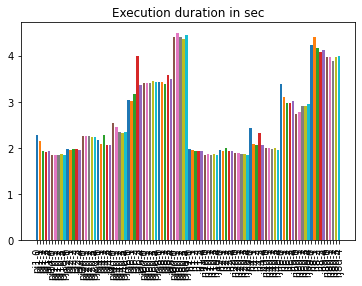

In [6]:
scenarios = dfr.scenarioId.sort_values().unique()

plt.title("Execution duration in sec")

for scenario in scenarios:
    for trail in dfr.loc[dfr.scenarioId == scenario].trailId.unique():
        execution_start = dfr.loc[(dfr.trailId == trail) & (dfr.scenarioId == scenario) & (dfr.step == 1)].sort_values(by=['eventId'])
        execution_end   = dfr.loc[(dfr.trailId == trail) & (dfr.scenarioId == scenario) & (dfr.step == 2)].sort_values(by=['eventId'])

        durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
        mean = durations.mean()
        std = durations.std()

        plt.bar(f"{scenario}-{trail}", mean.total_seconds())

plt.xticks(rotation = 90)


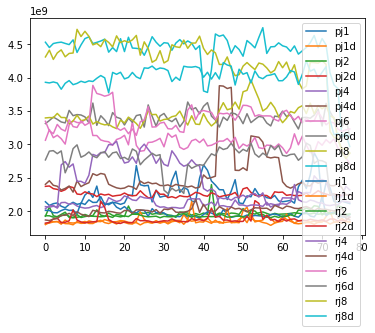

In [7]:
scenarios = dfr.scenarioId.sort_values().unique()

for scenario in scenarios:
    execution_start = dfr.loc[(dfr.trailId == 0) & (dfr.scenarioId == scenario) & (dfr.step == 1)].sort_values(by=['runNumber'])
    execution_end   = dfr.loc[(dfr.trailId == 0) & (dfr.scenarioId == scenario) & (dfr.step == 2)].sort_values(by=['runNumber'])

    xVals = dfr.loc[(dfr.trailId == 0) & (dfr.scenarioId == scenario)].runNumber.sort_values().unique()
    durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)

    plt.plot(xVals, durations, label=scenario)

plt.legend()
    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

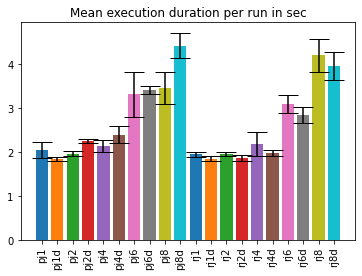

In [8]:
scenarios = dfr.scenarioId.sort_values().unique()

plt.title("Mean execution duration per run in sec")

for scenario in scenarios:
    execution_start = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 1)].sort_values(by=['eventId'])
    execution_end   = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 2)].sort_values(by=['eventId'])

    durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
    mean = durations.mean()
    std = durations.std()

    plt.bar(f"{scenario}", mean.total_seconds(), yerr=std.total_seconds(), capsize=10)

plt.xticks(rotation = 90)
    

Compile ['pj1', 'pj1d', 'pj2', 'pj2d', 'pj4', 'pj4d', 'pj6', 'pj6d', 'pj8', 'pj8d', 'rj1', 'rj1d', 'rj2', 'rj2d', 'rj4', 'rj4d', 'rj6', 'rj6d', 'rj8', 'rj8d'] [37.78215  23.758737 32.345906 25.506706 34.555666 25.344029 35.215
 24.858738 40.540027 24.971777 34.474943 23.810474 32.423095 23.843887
 32.487239 23.783313 33.415653 23.812061 34.002209 23.67339 ]
Compress ['pj1', 'pj1d', 'pj2', 'pj2d', 'pj4', 'pj4d', 'pj6', 'pj6d', 'pj8', 'pj8d', 'rj1', 'rj1d', 'rj2', 'rj2d', 'rj4', 'rj4d', 'rj6', 'rj6d', 'rj8', 'rj8d'] [22.103772 27.379771 21.956343 25.712773 22.010841 25.997648 25.338244
 28.718552 25.706356 30.63174  22.032407 28.421056 21.334545 27.128328
 21.295821 29.792927 24.135109 29.978131 24.702122 27.259622]
Extract ['pj1', 'pj1d', 'pj2', 'pj2d', 'pj4', 'pj4d', 'pj6', 'pj6d', 'pj8', 'pj8d', 'rj1', 'rj1d', 'rj2', 'rj2d', 'rj4', 'rj4d', 'rj6', 'rj6d', 'rj8', 'rj8d'] [10.10765  10.500087 11.594301 10.967031 15.406151 10.658902 10.054989
 10.511237  9.950308 10.686075 10.480217 10.93

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

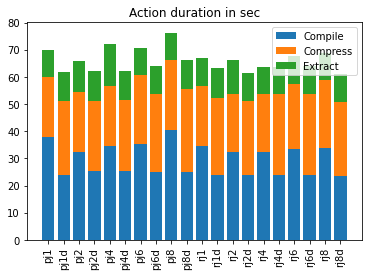

In [9]:
scenarios = dfa.scenarioId.sort_values().unique()
actions = dfa.action.sort_values().unique()

plt.title("Action duration in sec")

bottom = np.zeros(len(scenarios))
for action in actions:
    labels = []
    vals = np.zeros(len(scenarios))

    for inx, scenario in enumerate(scenarios):
        execution_start = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 1)].sort_values(by=['eventId'])
        execution_end   = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 2)].sort_values(by=['eventId'])

        durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
        val = durations.sum()

        labels.append(f"{scenario}")
        vals[inx] = val.total_seconds()

    plt.bar(labels, vals, label=action, bottom=bottom)
    print(action, labels, vals)
    bottom += vals
    
plt.legend()
plt.xticks(rotation = 90)
    

scenario-pj1  direction=Download tranfered= 11886970 sum= 28 val= 4.23
scenario-pj1d direction=Download tranfered= 12250697 sum= 57 val= 2.15
scenario-pj2  direction=Download tranfered= 11875767 sum= 31 val= 3.78
scenario-pj2d direction=Download tranfered= 12237781 sum= 31 val= 3.95
scenario-pj4  direction=Download tranfered= 11900974 sum= 52 val= 2.31
scenario-pj4d direction=Download tranfered= 12230967 sum= 31 val= 3.96
scenario-pj6  direction=Download tranfered= 11910614 sum= 65 val= 1.83
scenario-pj6d direction=Download tranfered= 12241246 sum= 30 val= 4.08
scenario-pj8  direction=Download tranfered= 11932099 sum= 62 val= 1.92
scenario-pj8d direction=Download tranfered= 12243471 sum= 33 val= 3.67
scenario-rj1  direction=Download tranfered= 11887326 sum= 41 val= 2.92
scenario-rj1d direction=Download tranfered= 12227201 sum=138 val= 0.88
scenario-rj2  direction=Download tranfered= 11891855 sum= 43 val= 2.79
scenario-rj2d direction=Download tranfered= 12244713 sum= 71 val= 1.74
scenar

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

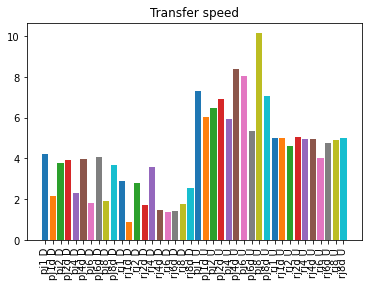

In [10]:
scenarios = dft.scenarioId.sort_values().unique()

directions = dft.direction.sort_values().unique()
#directions = ["Download"]

plt.title("Transfer speed")

for inx, direction in enumerate(directions):
    for scenario in scenarios:    
        tranfer_start = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['eventId'])
        tranfer_end   = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['eventId'])
        tranfered     = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction)].transferred.sum()

        durations = pd.to_timedelta(tranfer_end.timeStamp.values - tranfer_start.timeStamp.values)
        val = tranfered / durations.sum().total_seconds() / 100000

        print(f"scenario-%-4s direction=%-8s tranfered=%9d sum=%3.f val=%5.2f" % (scenario, direction, tranfered, durations.sum().total_seconds(), val))

        plt.bar(f"{scenario} {direction[0]}", val)
        
plt.xticks(rotation = 90)
        

Execution ['pj1', 'pj1d', 'pj2', 'pj2d', 'pj4', 'pj4d', 'pj6', 'pj6d', 'pj8', 'pj8d', 'rj1', 'rj1d', 'rj2', 'rj2d', 'rj4', 'rj4d', 'rj6', 'rj6d', 'rj8', 'rj8d'] [ 796.673087  720.994064  764.497588  879.028788  831.656365  936.249507
 1293.009907 1332.911407 1350.790534 1726.420618  759.741833  722.523791
  761.614864  728.509073  853.050833  773.823697 1206.296211 1113.378777
 1639.743163 1542.595086]
Upload ['pj1', 'pj1d', 'pj2', 'pj2d', 'pj4', 'pj4d', 'pj6', 'pj6d', 'pj8', 'pj8d', 'rj1', 'rj1d', 'rj2', 'rj2d', 'rj4', 'rj4d', 'rj6', 'rj6d', 'rj8', 'rj8d'] [0.993111 1.230705 1.155779 1.073622 1.254437 0.887938 0.915746 1.396712
 0.741818 1.048597 1.479407 1.496536 1.600978 1.47794  1.519728 1.484194
 1.858596 1.561902 1.516754 1.490146]
Download ['pj1', 'pj1d', 'pj2', 'pj2d', 'pj4', 'pj4d', 'pj6', 'pj6d', 'pj8', 'pj8d', 'rj1', 'rj1d', 'rj2', 'rj2d', 'rj4', 'rj4d', 'rj6', 'rj6d', 'rj8', 'rj8d'] [ 28.134791  57.012909  31.45203   31.013556  51.523369  30.848122
  65.109857  30.025062  6

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

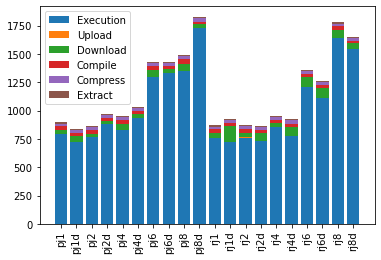

In [11]:
scenarios = dfr.scenarioId.sort_values().unique()

labels = []
sums = np.zeros(len(scenarios))

for inx, scenario in enumerate(scenarios):    
    exe_start     = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 1)].sort_values(by=['eventId'])
    exe_end       = dfr.loc[(dfr.scenarioId == scenario) & (dfr.step == 2)].sort_values(by=['eventId'])
    exe_durations = pd.to_timedelta(exe_end.timeStamp.values - exe_start.timeStamp.values)
    su = exe_durations.sum().total_seconds()
    sums[inx] = su
    labels.append(f"{scenario}")

print("Execution", labels, sums)
plt.bar(labels, sums, label="Execution")

bottom = np.zeros(len(scenarios))
bottom += sums

#'''
for direction in dft.direction.unique():
    labels = []
    sums = np.zeros(len(scenarios))

    for inx, scenario in enumerate(scenarios):    
        dtranfer_start     = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['eventId'])
        dtranfer_end       = dft.loc[(dft.scenarioId == scenario) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['eventId'])
        dtranfer_durations = pd.to_timedelta(dtranfer_end.timeStamp.values - dtranfer_start.timeStamp.values)
        su = dtranfer_durations.sum().total_seconds()
        sums[inx] = su
        labels.append(f"{scenario}")

    print(direction, labels, sums)
    plt.bar(labels, sums, label=direction, bottom=bottom)
    bottom += sums
#'''

for action in actions:
    labels = []
    vals = np.zeros(len(scenarios))

    for inx, scenario in enumerate(scenarios):
        execution_start = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 1)].sort_values(by=['eventId'])
        execution_end   = dfa.loc[(dfa.scenarioId == scenario) & (dfa.action == action) & (dfa.step == 2)].sort_values(by=['eventId'])

        durations = pd.to_timedelta(execution_end.timeStamp.values - execution_start.timeStamp.values)
        val = durations.sum()

        labels.append(f"{scenario}")
        vals[inx] = val.total_seconds()

    plt.bar(labels, vals, label=action, bottom=bottom)
    print(action, labels, vals)
    bottom += vals

plt.legend()
plt.xticks(rotation = 90)
    